# Animal Crossing - New Horizons
### Analysis of User/Critic Reviews and Villager/Item Characteristics
### By: Camden Kudrave
This data comes from the [tidytuesday](https://github.com/rfordatascience/tidytuesday/tree/master/data/2020/2020-05-05) repository on GitHub and was provided by [VillagerDB](https://github.com/jefflomacy/villagerdb) and [Metacritic](https://www.metacritic.com/game/animal-crossing-new-horizons/critic-reviews/?platform=switch).
VillagerDb provides data about the different villagers and items in the game, while Metacritic provides data about user and critic reviews of the game(scores and raw text).

From [Wikipedia](https://en.wikipedia.org/wiki/Animal_Crossing:_New_Horizons)

"Animal Crossing: New Horizons is a 2020 life simulation video game developed and published by Nintendo for the Nintendo Switch. It is the fifth main series title in the Animal Crossing series. New Horizons was released in all regions on March 20, 2020.

New Horizons sees the player assuming the role of a customizable character who moves to a deserted island after purchasing a package from Tom Nook, a tanuki character who has appeared in every entry in the Animal Crossing series. Taking place in real-time, the player can explore the island in a nonlinear fashion, gathering and crafting items, catching insects and fish, and developing the island into a community of anthropomorphic animals."


From [Polygon](https://www.polygon.com/2020/4/2/21201065/animal-crossing-new-horizons-calm-mindfulness-coronavirus-quarantine)

"With just a few design twists, the work behind collecting hundreds or even thousands of items over weeks anpd months becomes an exercise of mindfulness, predictability, and agency that many players find soothing instead of annoying.

Games that feature gentle progression give us a sense of progress and achievability, teaching us that putting in a little work consistently while taking things one step at a time can give us some fantastic results. It's a good life lesson, as well as a way to calm yourself and others, and it's all achieved through game design."


## Project Objectives
The primary objectives of this project are to:

**1. Understand the Public Reception:** Analyze user and critic reviews to gauge overall sentiment and reception of Animal Crossing: New Horizons. We aim to understand what players and critics alike appreciate or criticize about the game.

**2. Explore Villager Diversity:** Delve into the characteristics of the game's villagers, such as gender, species, and personality. This will help us understand the diversity and design choices of in-game characters.

**3. Item Analysis:** Investigate the variety and distribution of items within the game, focusing on categories, pricing, and crafting complexities. This analysis aims to shed light on the games's economic and crafting systems.

**4. Cultural Elements:** Utilize villagers' birthday information to assign star signs and explore cultural elements embedded within character design, potentially reflecting on player preferences or game design trends.

By addressing these objectives, we hope to uncover insights into the game's design and its impact on player experience, contributing to a deeper understanding of Animal Crossing: New Horizons' success and areas for further exploration.


## Outline
Here's a brief outline of how we can approach each potential analysis
### 1. Reviews Analysis:
* **Sentiment Analysis:** We can use natural language processing (NLP) techniques to determine the sentiment(positive, negative, or neutral) of user and critic reviews.
* **Text Analysis:** This can include extracting common themes or topics from the reviews using techniques like topic modeling, and identifying frequently used words or phrases.
* **Scores Analysis:** We can analyze the distribution of user and critic scores, compare average scores between different groups, and see if scores have changed over time.
* **Date Effect:** We can explore whether the timing of reviews (e.g., soon after release vs later) has an impact on the sentiment or scores.
### 2. Villagers/Items Analysis:
* **Demographics:** Analysis of villagers by gender, species, and personality to see if certain types are more prevalent or preferred.
* **Sayings Analysis:** We will look into the sayings of villagers to see if there are common themes or notable differences based on personality or species.
* **Pricing and Recipe Analysis:** For items, we can examine how pricing varies and what items require more complex recipes.
* **Star Sign Analysis:** Using the birthday column for villagers, we can assign star signs and see if there are any interesting patterns or distributions among them.

## Environment Setup

Before diving into our analysis, let's set up our Python environment by importing all the necessary libraries. These libraries will enable us to manipulate data (`pandas`), perform natural language processing (`TextBlob` and `nltk`), create visualizations (`matplotlib`), and more. This step ensures that we have all the tools at hand to conduct a thorough and efficient analysis.


In [1]:
# Setting up our python environment with analysis libraries
import pandas as pd
from textblob import TextBlob
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt

## Loading Datasets

With our environment ready, the next step is to load the datasets we'll be analyzing. These datasets contain valuable information about 'Animal Crossing: New Horizons', including user and critic reviews, details about in-game items, and characteristics of the villagers. The data comes from the following sources:

- **Critic Reviews**: Critical reception from various outlets, providing scores and textual reviews.
- **Items**: Information on in-game items, such as furniture and clothing, along with their attributes.
- **User Reviews**: Player reviews that offer direct feedback from the game's audience.
- **Villagers**: Data on the game's characters, including their names, species, and birthday information.

We will use the Pandas library to load these datasets into DataFrames for easy manipulation and analysis.


In [2]:
# Load the datasets
critic_reviews = pd.read_csv('C:\\Users\\Camden\\Desktop\\Data\\animal_crossing\\critic.tsv', sep = '\t')
items = pd.read_csv('C:\\Users\\Camden\\Desktop\\Data\\animal_crossing\\items.csv')
user_reviews = pd.read_csv('C:\\Users\\Camden\\Desktop\\Data\\animal_crossing\\user_reviews.tsv', sep = '\t')
villagers = pd.read_csv('C:\\Users\\Camden\\Desktop\\Data\\animal_crossing\\villagers.csv')

## Verifying Data Load

After loading the data, it's good practice to verify that everything has been imported as expected. We can do this by checking the first few rows of each DataFrame. This gives us an initial glimpse into the structure of the data and ensures that our datasets are ready for analysis.


In [3]:
# Display the first few rows of the datasets to understand its structure
pd.set_option('display.max_columns', None)
print(critic_reviews.head())
print(items.head())
print(user_reviews.head())
print(villagers.head())

   grade       publication                                               text  \
0    100   Pocket Gamer UK  Animal Crossing; New Horizons, much like its p...   
1    100            Forbes  Know that if you’re overwhelmed with the world...   
2    100         Telegraph  With a game this broad and lengthy, there’s mo...   
3    100             VG247  Animal Crossing: New Horizons is everything I ...   
4    100  Nintendo Insider  Above all else, Animal Crossing: New Horizons ...   

         date  
0  2020-03-16  
1  2020-03-16  
2  2020-03-16  
3  2020-03-16  
4  2020-03-16  
   num_id               id             name     category orderable  \
0      12       3d-glasses       3D Glasses  Accessories       NaN   
1      14            a-tee            A Tee         Tops       NaN   
2      17    abstract-wall    Abstract Wall    Wallpaper      True   
3      19  academy-uniform  Academy Uniform      Dresses       NaN   
4      20     acanthostega     Acanthostega      Fossils     False 

## Defining a Sentiment Analysis Function

Sentiment analysis is a key part of our exploration. It allows us to quantify the tone of the text in reviews—whether they are positive, negative, or neutral. To perform this analysis, we'll define a function named `calculate_sentiment` which utilizes the `TextBlob` library. This function will return the sentiment polarity score of the given text. A polarity score is a float within the range [-1.0, 1.0] where negative values indicate negative sentiment, positive values indicate positive sentiment, and values around zero indicate a neutral stance.


In [4]:
# Function to calculate sentiment
def calculate_sentiment(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

## Sentiment Function Ready

The `calculate_sentiment` function is now set up and ready to be applied to our textual data. By encapsulating this functionality within a function, we can easily reuse it across different datasets without repeating the code. This makes our analysis process cleaner and more modular.


## Applying Sentiment Analysis to Reviews

With our sentiment analysis function in place, we can now apply it to both the user and critic reviews. By doing this, we aim to quantify the emotional content of the reviews and see how users and critics feel about the game. This analysis could reveal patterns in player satisfaction and critical reception over time.


In [5]:
# Apply sentiment analysis to the reviews datasets
user_reviews['sentiment'] = user_reviews['text'].apply(calculate_sentiment)
critic_reviews['sentiment'] = critic_reviews['text'].apply(calculate_sentiment)


## Sentiment Analysis Applied

The sentiment scores have been successfully computed for each review. With this data, we can begin to explore various questions, such as: Are player reviews generally more positive or negative? How do critic sentiments compare to user sentiments? Do sentiments correlate with review scores? Answering these questions will provide a deeper understanding of the reception of 'Animal Crossing: New Horizons'.


## Previewing Sentiment Scores

Having applied the sentiment analysis to our review datasets, it's essential to preview the results to ensure the sentiment scores have been appropriately added. This initial peek will give us a snapshot of the sentiment polarity attached to a few reviews from both users and critics, setting the stage for a more detailed analysis to follow.


In [6]:
# Preview the updated DataFrames with the sentiment scores
print(f"Sentiment Analysis for User Reviews:\n{user_reviews.head()}")
print(f"Sentiment Analysis for Critic Reviews:\n{critic_reviews.head()}")

Sentiment Analysis for User Reviews:
   grade     user_name                                               text  \
0      4      mds27272  My gf started playing before me. No option to ...   
1      5      lolo2178  While the game itself is great, really relaxin...   
2      0      Roachant  My wife and I were looking forward to playing ...   
3      0        Houndf  We need equal values and opportunities for all...   
4      0  ProfessorFox  BEWARE!  If you have multiple people in your h...   

         date  sentiment  
0  2020-03-20  -0.025675  
1  2020-03-20   0.193966  
2  2020-03-20  -0.100000  
3  2020-03-20   0.210000  
4  2020-03-20   0.070238  
Sentiment Analysis for Critic Reviews:
   grade       publication                                               text  \
0    100   Pocket Gamer UK  Animal Crossing; New Horizons, much like its p...   
1    100            Forbes  Know that if you’re overwhelmed with the world...   
2    100         Telegraph  With a game this broad and l

## Initial Observations from Sentiment Scores

Upon examining the top rows of our updated DataFrames, we can observe the sentiment scores alongside the reviews. For instance, user reviews display a range of sentiments, from slightly negative to positive, indicating varying degrees of satisfaction. Similarly, the critic reviews show generally positive sentiment scores, which could reflect an overall favorable critical reception. These initial observations suggest a nuanced response to the game that we will explore further in our subsequent analysis.


## Preparing Text Analysis Toolkit

Before diving into text analysis, we'll ensure that we have all the necessary components of the Natural Language Toolkit (NLTK). This includes downloading a list of stopwords, which are common words like 'the', 'is', and 'in', that are typically removed during text processing to focus on the more meaningful words.


In [7]:
# Download stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Camden\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Stopwords Ready

The stopwords package from NLTK has been downloaded and is up-to-date. With these stopwords, we can clean our review texts to ensure our analysis is focused on the words that carry the most meaning. This preparation step is vital for accurate and insightful text analysis.


## Applying the Text Cleaning Function

With our `clean_text` function defined, the next step is to apply this function to the review texts. This will strip away punctuation, convert all text to lowercase, remove common stopwords, and split the texts into individual words. This process will yield a list of meaningful words from each review that we can analyze to uncover common themes and vocabulary used by reviewers.


In [8]:
# Function to clean text data
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = text.split()
    stop_words = set(stopwords.words('english'))
    meaningful_words = [word for word in words if word not in stop_words]
    return meaningful_words

## Cleaned Text Data Ready for Analysis

The review texts have been processed using our `clean_text` function. We now have a refined set of words that strips out common stopwords and any non-alphabetic characters, providing us with the essence of the reviewers' comments. This cleaned data is now primed for deeper text analysis, such as frequency distribution of words, which can shed light on the reviewers' key talking points and sentiments.


## Cleaning User Review Texts

To further analyze the user reviews, we'll apply our previously defined `clean_text` function to each review. This process will remove common stopwords, punctuation, and make all text lowercase, ensuring that our analysis focuses on the most meaningful words used by the players. The cleaned words from all reviews will then be combined into a single list, preparing us for a comprehensive word frequency analysis.


In [9]:
# Apply the clean_text function to each review and combine all words into a single list
user_review_words = sum(user_reviews['text'].apply(clean_text).tolist(), [])


## User Review Texts Cleaned and Aggregated

The text of each user review has been cleaned and processed. By aggregating these words into a single list, we have prepared a consolidated dataset of meaningful words from all user reviews. This dataset is now ready for further analysis, such as identifying the most frequently mentioned words, which can reveal common themes and topics of discussion among the players.


## Analyzing Word Frequencies in User Reviews

Having cleaned the user review texts, our next step is to analyze the frequency of each word across all reviews. This analysis will help us identify the most commonly discussed topics and themes by the players. We expect to see frequent mentions of key game elements and possibly player sentiments. We'll use the `Counter` class from the `collections` module to tally the occurrences of each word and then extract the top 10 most common words for closer examination.


In [10]:
# Count the frequency of each word
word_counts = Counter(user_review_words)

In [11]:
most_common_words = word_counts.most_common(10)

In [12]:
print(most_common_words)

[('game', 8661), ('island', 3911), ('one', 3181), ('switch', 2189), ('play', 2159), ('player', 1789), ('nintendo', 1674), ('per', 1606), ('console', 1446), ('new', 1427)]


## Insights from Word Frequencies in User Reviews

The word frequency analysis reveals the top words used in user reviews: 'game', 'island', 'one', 'switch', 'play', 'player', 'nintendo', 'per', 'console', and 'new'. These words highlight the central aspects of 'Animal Crossing: New Horizons' that resonate with players, such as the game's setting ('island'), the platform it's played on ('switch', 'console'), and perhaps aspects of gameplay ('play', 'player').

The prominence of 'game' and 'new' might reflect discussions about 'New Horizons' as a new installment in the 'Animal Crossing' series. The word 'Nintendo' underscores the brand's impact on players' experiences. This analysis provides a foundational understanding of what aspects of the game are most frequently discussed, setting the stage for deeper exploration of player sentiments and opinions.


## Sentiment Analysis for Specific Contexts

To delve deeper into the sentiment surrounding key aspects of the game, we'll extract sentences from user reviews that contain the word "game" and analyze their sentiment. This focused analysis will help us understand not just how often the game is mentioned, but also in what emotional context. It can provide nuanced insights into players' perceptions and feelings about the game as a whole.


In [14]:
# Function to extract sentences containing a specific word and calculate their sentiment
def extract_sentences_and_sentiment(reviews, word):
    sentences_with_word = []
    sentiments = []

    # Iterate through each review
    for review in reviews:
        # Split the review into sentences
        sentences = re.split(r'[.!?]', review)
        # Check each sentence for the presence of the word
        for sentence in sentences:
            if word in sentence:
                # Clean and calculate sentiment
                cleaned_sentence = clean_text(sentence)
                sentiment = calculate_sentiment(' '.join(cleaned_sentence))
                sentences_with_word.append(' '.join(cleaned_sentence))
                sentiments.append(sentiment)

    return sentences_with_word, sentiments

In [15]:
# Extract sentences and sentiments for the word 'game'
sentences_game, sentiments_game = extract_sentences_and_sentiment(user_reviews['text'], 'game')


In [16]:
# Preview a few sentences and their sentences
print(list(zip(sentiments_game[:5], sentiments_game[:5])))

[(0.05000000000000001, 0.05000000000000001), (0.19285714285714287, 0.19285714285714287), (0.23125, 0.23125), (-0.20000000000000004, -0.20000000000000004), (-0.4, -0.4)]


## Sentiment Context Analysis for the Word "Game"

The sentiment analysis of sentences containing the word "game" shows a range of emotions, from positive to negative. Positive sentiments may reflect players' enjoyment and satisfaction with the game, highlighting its strengths and the joy it brings. Conversely, negative sentiments could indicate areas of frustration or disappointment, offering valuable feedback for potential improvements. This analysis underscores the complexity of player experiences and the diverse ways in which the game impacts its audience.


## Exploring the Distribution of User Review Scores

Understanding the distribution of review scores can provide us with insight into the game's reception by its players. A histogram will allow us to visualize the frequency of different scores given by users. We would expect a normal distribution in a typical scenario, but any skewness or unusual patterns could indicate specific trends or biases in player feedback, such as polarized opinions or a tendency towards extreme scores.


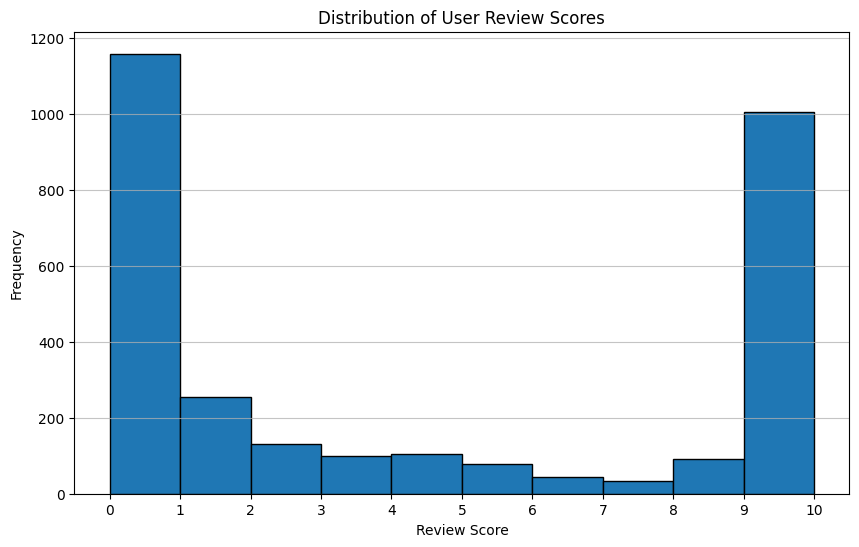

In [17]:
# Plot the distribution of user review scores
plt.figure(figsize=(10, 6))
plt.hist(user_reviews['grade'], bins=range(0, 11), edgecolor = 'black')
plt.title('Distribution of User Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.xticks(range(0, 11))
plt.grid(axis='y', alpha=0.75)
plt.show()


## Insights from the Distribution of User Review Scores

The histogram of user review scores reveals a polarized distribution with peaks at the lower and higher ends of the scale. This bimodal pattern suggests that players' opinions on the game are strongly divided. A significant number of players rated the game very highly, indicating a deep appreciation and enjoyment of the game. Conversely, the peak at the lower end of the spectrum might reflect a segment of the player base that is dissatisfied or encountered aspects of the game that did not meet their expectations. Such a distribution warrants a closer look at the reviews to understand the reasons behind these extreme opinions.


## Analyzing the Correlation Between Review Scores and Sentiment

To quantitatively assess the relationship between the numerical review scores and the sentiment of the text in reviews, we'll compute the correlation coefficient. This statistic will help us understand if there is a linear relationship between how users score the game and the emotional tone of their review text. A positive correlation would suggest that higher scores are typically associated with more positive sentiment in the review text, and vice versa.


In [18]:
# Score and Sentiment Correlation
correlation = user_reviews['grade'].corr(user_reviews['sentiment'])
print("Correlation between user review scores and sentiment", correlation)


Correlation between user review scores and sentiment 0.38801131006700024


## Insights from Correlation Analysis

The correlation coefficient between user review scores and sentiment is approximately 0.39, indicating a moderate positive relationship. This suggests that reviews with higher scores tend to have more positive sentiment, which aligns with expectations — users who enjoy the game are more likely to express positive emotions in their reviews. However, the correlation is not strong, implying that other factors may also influence review scores and sentiment, such as individual user expectations or specific aspects of the game experience.


## Analyzing Review Scores Over Time by Month

To capture the trend of user satisfaction over time, we will convert the review dates into a datetime format and extract the month. This will allow us to group the reviews by month and calculate the average review score for each month. Analyzing these average scores over time can reveal how user sentiment has evolved, potentially highlighting the impact of game updates, events, or external factors.


In [19]:
# Convert date to datetime, extract month, then group by month to calculate average score
user_reviews['date'] = pd.to_datetime(user_reviews['date'])
user_reviews['month'] = user_reviews['date'].dt.to_period('M')
average_scores_by_month = user_reviews.groupby('month')['grade'].mean()


## Insights from Monthly Average Review Scores

By examining the average review scores by month, we can observe how the community's perception of the game has changed over time. Any significant trends or changes in the average scores could correlate with game updates, seasonal events, or other significant occurrences within the game's community. Identifying these trends will be crucial for understanding the long-term engagement and satisfaction of players with 'Animal Crossing: New Horizons'.


## Visualizing the Trend of Average User Review Scores Over Time

To get a clearer picture of how player perceptions may have shifted post-release, we will visualize the average user review scores over time. This trend analysis can help us identify any overarching patterns, such as a gradual increase or decrease in satisfaction as the game matures and evolves through updates and community development.


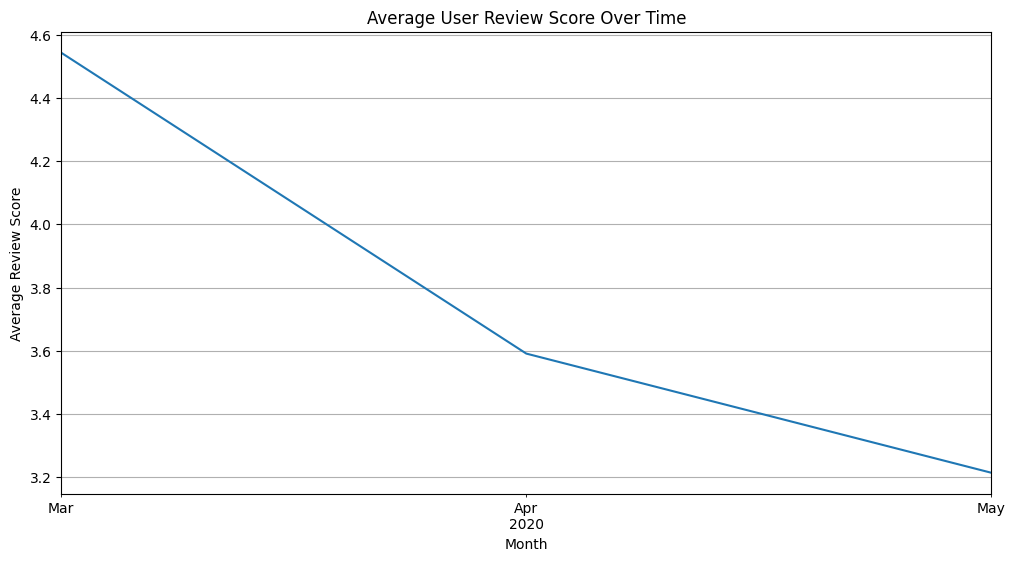

In [20]:
# Potting trend over time
plt.figure(figsize=(12, 6))
average_scores_by_month.plot()
plt.title('Average User Review Score Over Time')
plt.xlabel('Month')
plt.ylabel('Average Review Score')
plt.grid(True)
plt.show()


## Analysis of Trends in User Review Scores

The plot above illustrates a downward trend in average user review scores over the first few months following the game's release. Several factors could contribute to this trend, such as the initial excitement wearing off, players encountering limitations or issues as they spend more time with the game, or the comparison with players' expectations as they experience more of what the game has to offer. It would be valuable to compare these findings with game update logs, community events, and external factors to provide context to these trends.


## Trend Analysis of User Review Scores Over Time

To understand how players' perceptions of the game have evolved since its release, we will analyze the trend of user review scores over time. A consistent increase or decrease in average scores could indicate changing player satisfaction, possibly influenced by game updates, seasonal events, or other external factors.


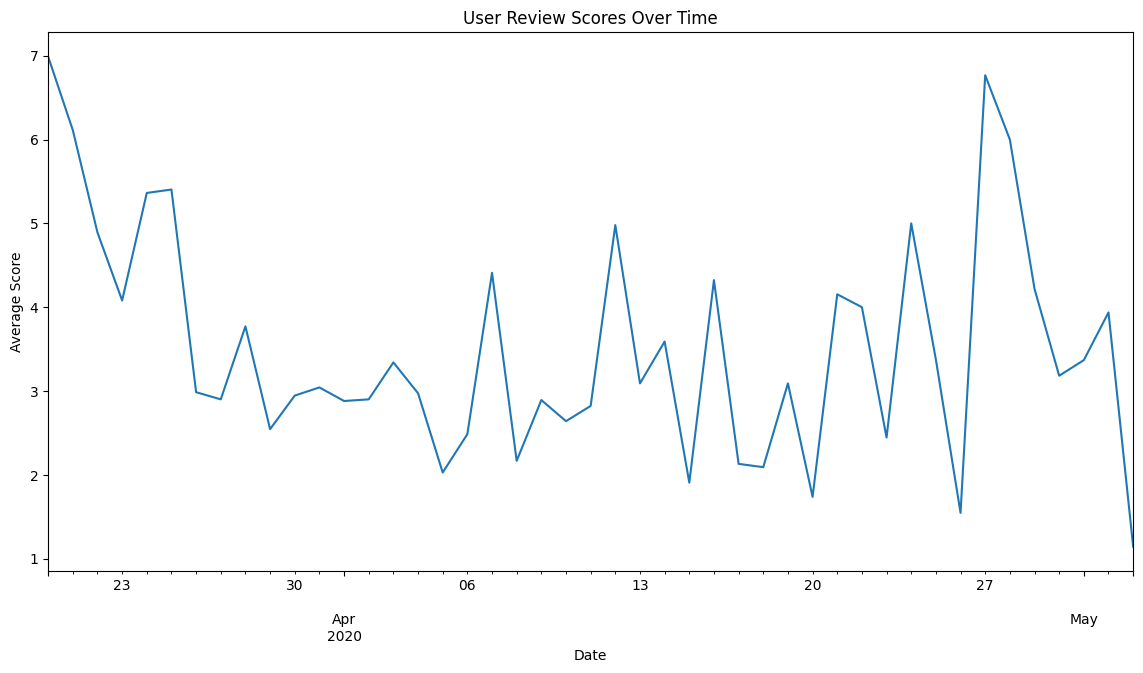

In [51]:
# Convert review dates to datetime
user_reviews['date'] = pd.to_datetime(user_reviews['date'])
critic_reviews['date'] = pd.to_datetime(critic_reviews['date'])

# Aggregate the scores and sentiment by date
user_scores_over_time = user_reviews.groupby('date')['grade'].mean()
critic_scores_over_time = critic_reviews.groupby('date')['grade'].mean()

user_sentiment_over_time = user_reviews.groupby('date')['sentiment'].mean()
critic_sentiment_over_time = critic_reviews.groupby('date')['sentiment'].mean()

# Plotting user review scores over time
plt.figure(figsize=(14, 7))
user_scores_over_time.plot(title='User Review Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Average Score')
plt.show()



## Insights from User Review Scores Trend

The plot above shows the average user review scores over time. We can observe fluctuations in the scores, with some peaks and troughs. Notably, there's a downward trend in the initial period following the release, which could suggest the waning of an initial honeymoon phase or players' reactions to unforeseen issues as they delved deeper into the game. Following this, the scores show variability, which might correspond to the release of new content, game patches, or simply the changing dynamics of the player base.


## Trend Analysis of User Sentiment Over Time

Next, we will explore the average sentiment of user reviews over time. This sentiment trend can provide additional context to the numerical scores, offering insights into the nuances of player feedback that are not captured by scores alone.


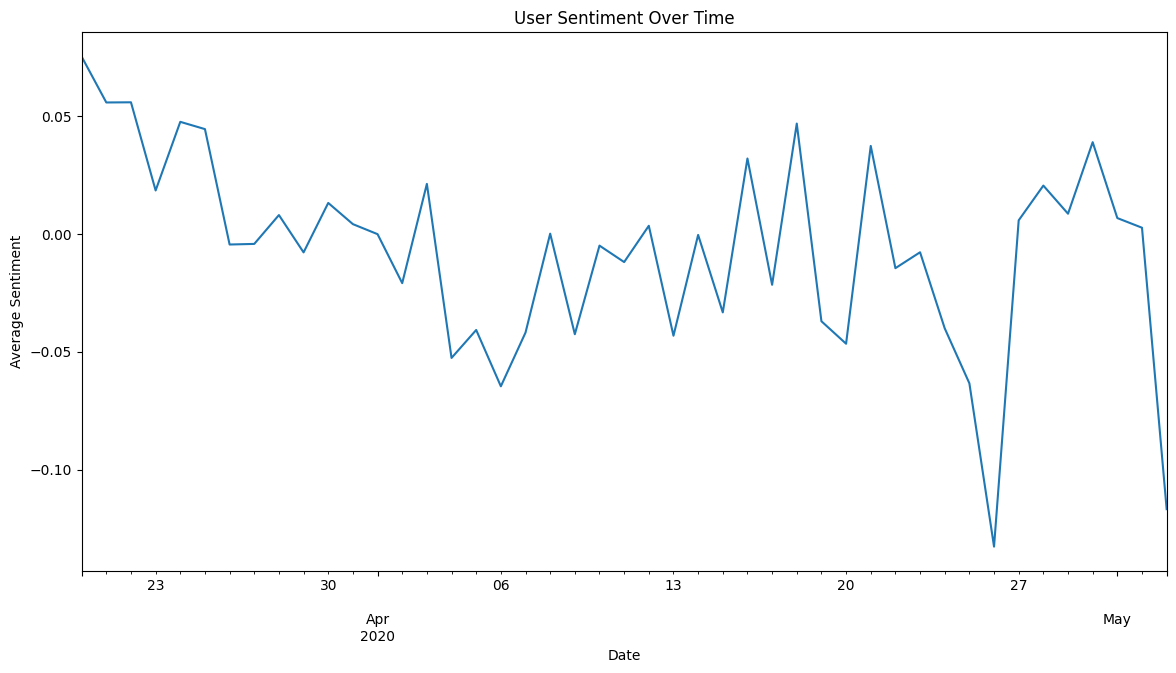

In [50]:
# Plotting user sentiment over time
plt.figure(figsize=(14, 7))
user_sentiment_over_time.plot(title='User Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.show()


## Insights from User Sentiment Trend

The sentiment analysis trend for user reviews reveals a somewhat negative skew in sentiment over time, with occasional upticks. This pattern suggests that while users may have had strong positive reactions to certain aspects of the game or updates, there are also periods of less favorable views. The reasons behind these sentiments could be a mix of gameplay elements, community responses to in-game events, or external influences. It would be beneficial to correlate these sentiment trends with specific updates or events in the game's lifecycle for a more detailed understanding.


## Analyzing Villager Gender Distribution

A balanced representation of genders within the game's characters can contribute to a more inclusive experience for players. We will analyze the distribution of genders among the Animal Crossing villagers to see how evenly represented male and female characters are.


In [21]:
# Gender distribution
gender_distribution = villagers['gender'].value_counts()
print(gender_distribution)


gender
male      204
female    187
Name: count, dtype: int64


## Insights from Gender Distribution Among Villagers

The gender distribution among Animal Crossing villagers is relatively balanced, with a slight majority of male characters. There are 204 male villagers compared to 187 female villagers. This near parity in gender distribution helps ensure that players have a diverse range of characters to interact with, which can enhance the overall inclusiveness and appeal of the game's world.


## Exploring Species Diversity Among Villagers

Animal Crossing is known for its wide array of anthropomorphic characters, each with distinct personalities and styles. To understand the biodiversity within the game, we will analyze the distribution of species among the villagers. This distribution can offer insights into the variety of character designs and how they contribute to the game's vibrant and diverse ecosystem.


In [22]:
# Species distribution
species_distribution = villagers['species'].value_counts()
print(species_distribution)


species
cat          23
rabbit       20
frog         18
squirrel     18
duck         17
dog          16
cub          16
pig          15
bear         15
mouse        15
horse        15
bird         13
penguin      13
sheep        13
elephant     11
wolf         11
ostrich      10
deer         10
eagle         9
gorilla       9
chicken       9
koala         9
goat          8
hamster       8
kangaroo      8
monkey        8
anteater      7
hippo         7
tiger         7
alligator     7
lion          7
bull          6
rhino         6
cow           4
octopus       3
Name: count, dtype: int64


## Insights from Villager Species Distribution

The species distribution data reveals a diverse range of characters in the Animal Crossing world, with cats being the most common species, followed closely by rabbits, frogs, and squirrels. This diversity not only reflects the game's commitment to a varied and engaging player experience but also allows players to find a character they can connect with, enhancing the personalization of the game. The lesser-represented species, such as the octopus, offer unique interactions, potentially making those characters more sought after by players for their rarity.


## Exploring Villager Personality Distribution

The personalities of the villagers are central to how they interact with the player and each other in the game. By analyzing the distribution of these personality types, we can gain insight into the dynamics of villager behavior that players are likely to encounter. A diverse range of personalities can contribute to a more engaging and varied gameplay experience.


In [23]:
# Personality distribution
personality_distribution = villagers['personality'].value_counts()
print(personality_distribution)


personality
lazy      60
normal    59
cranky    55
snooty    55
jock      55
peppy     49
smug      34
uchi      24
Name: count, dtype: int64


## Insights from Personality Distribution Among Villagers

The breakdown of villager personalities reveals a relatively even spread across different traits, with 'lazy', 'normal', and 'cranky' being slightly more prevalent. This diversity in personality types ensures that players have a rich tapestry of interactions and relationships to discover within their virtual community. The presence of unique personalities like 'smug' and 'uchi' (sisterly) add depth to the villagers' interactions, influencing the social dynamics of the game.


## Visualizing Gender Distribution Among Villagers

After analyzing the gender distribution in numerical terms, it's often more insightful to see this data represented visually. A bar chart will provide us with a clear comparison of the number of male and female villagers in 'Animal Crossing'. This visual representation can help us quickly grasp the balance between the genders within the game's population.


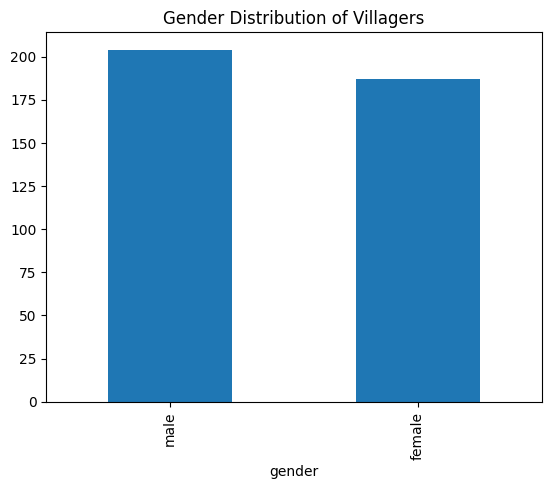

In [24]:
# Gender distribution plot
gender_distribution.plot(kind='bar')
plt.title('Gender Distribution of Villagers')
plt.show()


## Interpreting the Gender Distribution Plot

The bar chart above visually demonstrates the gender distribution of villagers, indicating a slight skew towards male characters. While the difference is not drastic, it does suggest that the game has a somewhat greater variety of male villagers. This information might be useful for game developers looking to balance representation, or for players who may have a preference for interacting with villagers of a specific gender.


## Visualizing the Diversity of Villager Species

'Animal Crossing' is celebrated for its rich variety of villager species, each adding to the game's dynamic ecosystem. To better appreciate this diversity, we will visualize the species distribution among the villagers using a bar chart. This will help us identify which species are more common and which are rare, potentially informing how players might prioritize their interactions in the game.


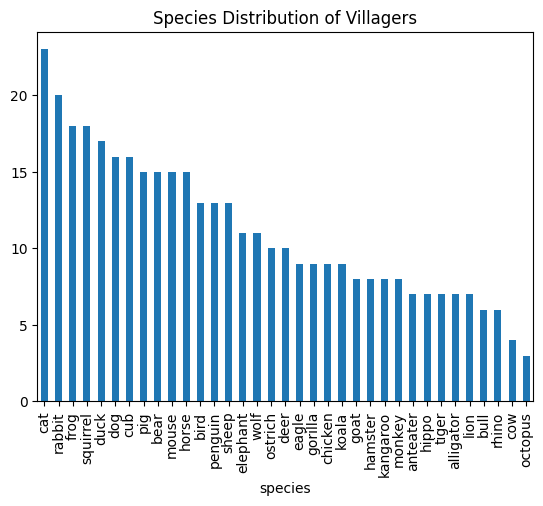

In [25]:
# Species distribution plot
species_distribution.plot(kind='bar')
plt.title('Species Distribution of Villagers')
plt.show()


## Insights from Species Distribution Among Villagers

The bar chart depicts the number of villagers for each species, with cats, rabbits, and frogs being some of the most common species in 'Animal Crossing'. The variety in species representation adds to the player's sense of discovery and personalization as they encounter and befriend different types of animal neighbors. This diversity is likely a deliberate design choice to maintain a world that feels lively, engaging, and full of surprises.


## Visualizing Villager Personality Distribution

Each villager in 'Animal Crossing' has a distinct personality that affects their behavior and interactions. These personalities contribute to the dynamics of the game and can significantly impact the player experience. We'll create a bar chart to visualize the distribution of these personalities, which will provide a clear overview of the character types that players are most likely to encounter.


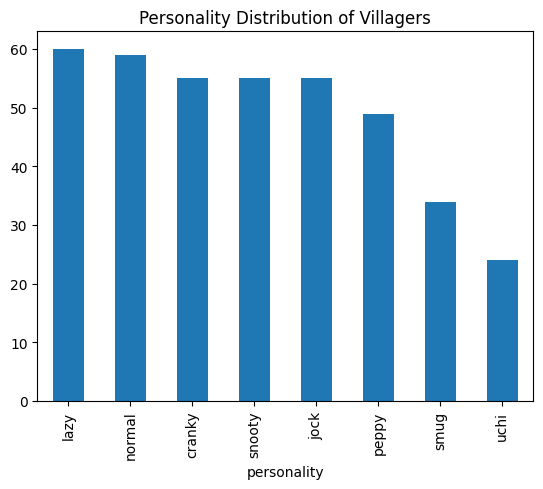

In [26]:
# Personality distribution plot
personality_distribution.plot(kind='bar')
plt.title('Personality Distribution of Villagers')
plt.show()


## Interpreting the Personality Distribution Plot

The personality distribution plot illustrates the range of character types that populate the game world, with 'lazy', 'normal', 'cranky', 'snooty', and 'jock' being the most common. This variety ensures that players will have diverse interactions, making each player's experience unique. The less common personalities, such as 'smug' and 'uchi', add a layer of rarity and uniqueness to the villagers players may meet, possibly making these encounters more memorable.


## Analysis of Villager Sayings

Villagers in Animal Crossing have unique sayings that can reflect their personalities. In this section, we will analyze these sayings to uncover the most common words, which may highlight recurring themes in their dialogue. Additionally, we'll conduct a sentiment analysis to understand the emotional tone behind the phrases. This could give us insights into how the game's dialogue contributes to the overall atmosphere and player experience.


In [36]:
# Clean the 'phrase' data and combine all phrases into a single list
phrase_words = sum(villagers['phrase'].apply(clean_text).tolist(), [])

# Count the frequency of each word in the phrases
phrase_word_counts = Counter(phrase_words)

# Identify the most common words in the phrases
most_common_phrase_words = phrase_word_counts.most_common(10)
print("Most Common Words in Villager Sayings:")
print(most_common_phrase_words)

Most Common Words in Villager Sayings:
[('lil', 4), ('honk', 3), ('one', 3), ('la', 3), ('wee', 3), ('yo', 3), ('aye', 2), ('bloop', 2), ('quacko', 2), ('yip', 2)]


In [39]:
# Apply sentiment analysis to the 'phrase' column
villagers['phrase_sentiment'] = villagers['phrase'].apply(calculate_sentiment)

# Sort the DataFrame by 'phrase_sentiment' in descending order and display the top rows
sorted_villagers = villagers.sort_values(by='phrase_sentiment', ascending=False)
print("Villagers with Highest Sentiment Sayings:")
print(sorted_villagers[['name', 'phrase', 'phrase_sentiment']].head(10))

Villagers with Highest Sentiment Sayings:
         name     phrase  phrase_sentiment
209    Lionel  precisely              0.40
256     Olive  sweet pea              0.35
301       Rex   cool cat              0.35
298   Raymond      crisp              0.25
91       Cobb    hot dog              0.25
257    Olivia      purrr              0.00
266     Patty    how now              0.00
265      Pate    quackle              0.00
264  Pashmina    kidders              0.00
263      Papi      haaay              0.00


## Most Common Words in Villager Sayings

The most frequently occurring words in villager sayings include words like 'lil', 'honk', and 'la', which seem to evoke a sense of whimsy and playfulness. This fits well with the light-hearted and comforting nature of the game.

## Villagers with the Most Positive Sayings

Upon analyzing the sentiment of villager sayings, we observe that some villagers have distinctly positive phrases. For example, Lionel's use of 'precisely' and Olive's 'sweet pea' suggest a tone of positivity and friendliness. These phrases may influence how players perceive and interact with these characters, potentially making them more likable and sought after by players. On the other hand, neutral sentiments, such as those from Olivia and Pate, might indicate a more balanced or reserved character interaction.


## Sentiment Analysis of Villager Sayings

Now, we will perform a sentiment analysis on the phrases used by villagers. This will help us understand the emotional tone associated with different villagers and how this might relate to their personalities. We expect to find variations that reflect the diversity in character design within the game.


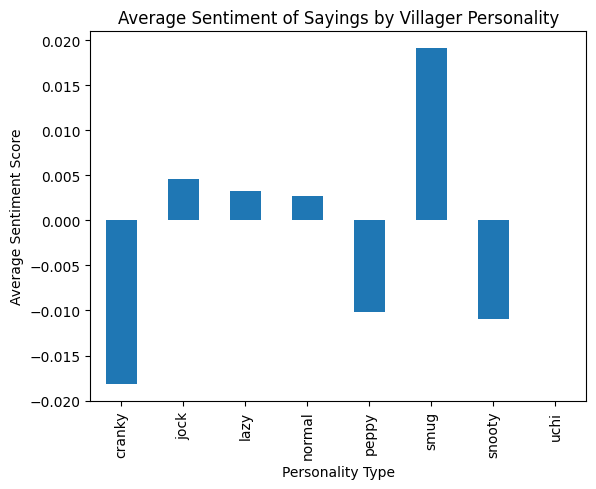

In [43]:
# Group the data by personality and calculate the average sentiment for each personality type
average_sentiment_by_personality = villagers.groupby('personality')['phrase_sentiment'].mean()

# Plotting
average_sentiment_by_personality.plot(kind='bar', title='Average Sentiment of Sayings by Villager Personality')
plt.xlabel('Personality Type')
plt.ylabel('Average Sentiment Score')
plt.show()

## Insights from Sentiment Analysis

The sentiment analysis of villager sayings reveals that certain personality types, such as 'smug' and 'jock', tend to have more positive phrases. This finding aligns with the game's intent to create a comforting and cheerful environment for players. Conversely, 'cranky' villagers have lower sentiment scores, which is consistent with their portrayal in the game.


## Categorizing In-game Items

Items in 'Animal Crossing: New Horizons' come in various categories, from furniture to clothing to tools. Understanding the distribution of these items can reveal which categories are more saturated and which offer more variety, potentially affecting how players collect and utilize them. We will now analyze the distribution of items across different categories to see what types of items players interact with the most.


In [27]:
# Get the distribution of items by category
category_distribution = items['category'].value_counts()


## Item Category Distribution

With the distribution of items by category calculated, we can observe which categories are more prevalent in the game. A larger number of items in a particular category may indicate a focus on that area of gameplay or customization. For instance, a high frequency of furniture items could suggest an emphasis on home customization, a core aspect of the 'Animal Crossing' experience. Understanding this distribution can help us appreciate the game's design priorities and the player's potential focus areas.


## Visualizing Item Category Distribution in 'Animal Crossing'

To provide a visual summary of the different types of items available in 'Animal Crossing', we will create a bar chart to display the frequency of each item category. This will allow us to quickly identify which categories are most abundant and which are less common, offering insights into the game's design and the potential variety in gameplay experiences.


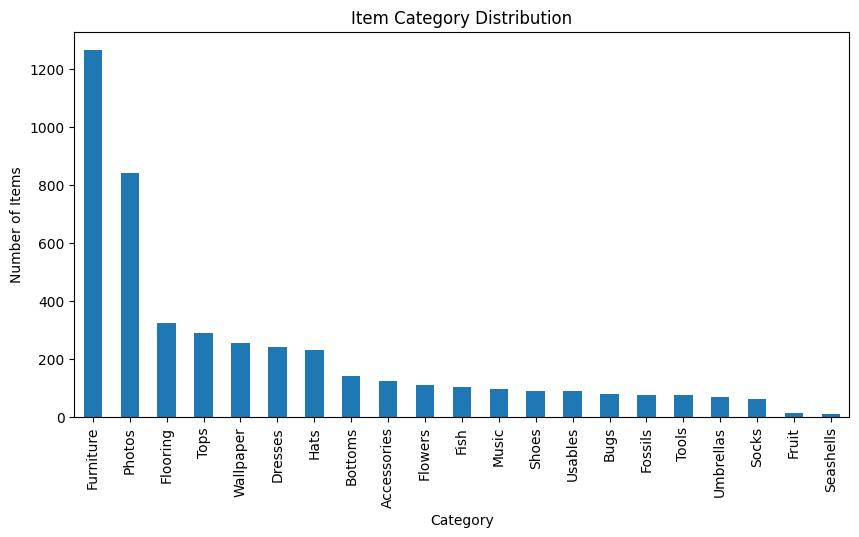

In [28]:
# Plot the distribution
category_distribution.plot(kind='bar', figsize=(10, 5))
plt.title('Item Category Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Items')
plt.show()


## Insights from the Item Category Distribution Plot

The bar chart illustrates the distribution of item categories in 'Animal Crossing', with furniture items being by far the most numerous. This suggests that interior and exterior decoration play a significant role in the game, providing players with ample opportunities to personalize their space. The prevalence of these items may encourage creativity and self-expression, key aspects that contribute to the game's lasting appeal. Conversely, categories with fewer items, such as 'music' and 'umbrellas', might be areas for potential expansion in future game updates to enhance the variety and depth of the player's experience.


## Analyzing the Economic Value of Items

An important aspect of 'Animal Crossing' is the in-game economy, where items have certain sell values measured in Bells, the currency of the game. By examining the distribution of these sell values, we can understand the economic landscape that players navigate. This histogram will illustrate how item values are spread and identify any common price points or outliers that might exist.


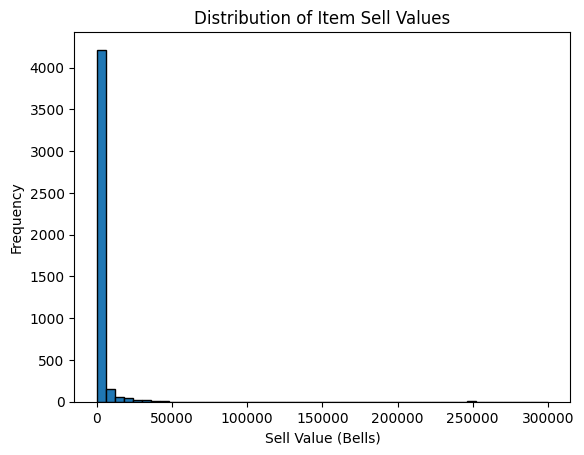

In [29]:
# Plot the distribution of sell values
plt.hist(items['sell_value'].dropna(), bins=50, edgecolor='black')
plt.title('Distribution of Item Sell Values')
plt.xlabel('Sell Value (Bells)')
plt.ylabel('Frequency')
plt.show()


## Insights from the Distribution of Item Sell Values

The histogram for item sell values indicates that a vast majority of items fall into the lower price range, with a steep drop-off as values increase. This pattern suggests that while there are plenty of affordable items for players to sell, high-value items are comparatively rare, potentially making them more sought after in the game. Such a distribution may encourage players to engage in activities that yield these valuable items, driving the in-game economy and player behavior.


## Exploring Crafting Recipe Complexity

Crafting is a significant aspect of 'Animal Crossing', with players able to create a wide range of items using various recipes. The complexity of these recipes, measured by the number of components required, can influence how players collect resources and engage with the crafting system. We will analyze the complexity of these recipes to see how accessible or challenging crafting in the game might be.


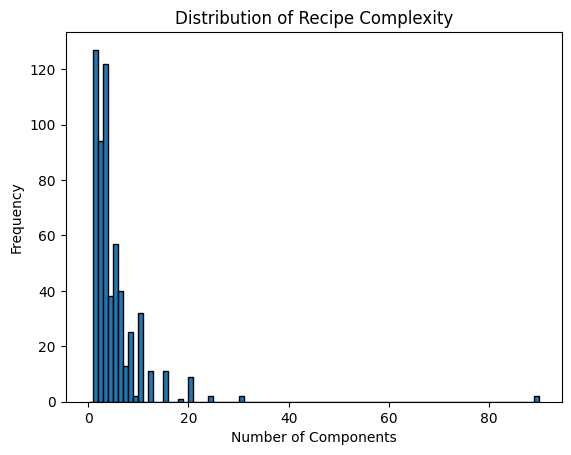

In [30]:
# Plot the distribution of recipe complexity
plt.hist(items['recipe'].dropna(), bins=range(int(items['recipe'].max() + 1)), edgecolor='black')
plt.title('Distribution of Recipe Complexity')
plt.xlabel('Number of Components')
plt.ylabel('Frequency')
plt.show()


## Insights from Recipe Complexity Histogram

The histogram displaying the distribution of recipe complexity shows that most recipes require a small number of components, suggesting that crafting in 'Animal Crossing' is generally accessible and not overly complex. This could be seen as encouraging engagement with crafting, allowing players to easily create items and enjoy the satisfaction of building up their island. However, the existence of recipes with a higher number of components also provides depth to the crafting system, catering to players who enjoy more complex and time-consuming projects.


## Assigning Zodiac Signs to Villagers

In 'Animal Crossing', each villager has a birthday, which can be used to assign them a zodiac sign. Zodiac signs add an extra layer of personality and can influence the way players perceive and interact with the villagers. We will define the date ranges for each zodiac sign, which will allow us to later assign these signs to the villagers based on their birthdays.


In [31]:
# Define the zodiac signs with their corresponding date ranges
zodiac_dates = {
    'Capricorn': [(12, 22), (1, 19)],
    'Aquarius': [(1, 20), (2, 18)],
    'Pisces': [(2, 19), (3, 20)],
    'Aries': [(3, 21), (4, 19)],
    'Taurus': [(4, 20), (5, 20)],
    'Gemini': [(5, 21), (6, 20)],
    'Cancer': [(6, 21), (7, 22)],
    'Leo': [(7, 23), (8, 22)],
    'Virgo': [(8, 23), (9, 22)],
    'Libra': [(9, 23), (10, 22)],
    'Scorpio': [(10, 23), (11, 21)],
    'Sagittarius': [(11, 22), (12, 21)]
}


## Zodiac Sign Ranges Established

The zodiac sign date ranges have been established, setting the stage for us to integrate this aspect into our analysis of the villagers. By associating villagers with zodiac signs, we may uncover interesting patterns or distributions that could inform how the game's character designs may resonate with astrological beliefs and player preferences.


## Creating a Zodiac Sign Assignment Function

With the zodiac sign date ranges defined, we now need a function that can assign the correct zodiac sign to each villager based on their birthday. This function will iterate over the defined zodiac date ranges and determine which sign corresponds to each villager's birthday, allowing us to enrich our dataset with this new layer of personalization.


In [32]:
# Function to determine the zodiac sign based on the birthday
def get_zodiac_sign(month, day):
    for sign, ((start_month, start_day), (end_month, end_day)) in zodiac_dates.items():
        if (month == start_month and day >= start_day) or (month == end_month and day <= end_day):
            return sign
    return "Unknown"


## Zodiac Sign Assignment Function Ready

The `get_zodiac_sign` function is now prepared to be applied to our dataset. This will enable us to assign a zodiac sign to each villager and potentially explore correlations between zodiac signs and other villager attributes, such as personality or popularity among players.


## Assigning Zodiac Signs to Villagers

With our zodiac sign function in place, we can now apply it to the villagers' birthdays. First, we need to ensure that the birthday data is in the correct format to extract the necessary month and day information. Then, we'll use our function to assign each villager their zodiac sign.


In [33]:
# Convert the birthday from a string to a datetime object and extract the month and day
villagers['birthday'] = pd.to_datetime(villagers['birthday'], errors='coerce', format='%m-%d')
villagers = villagers.dropna(subset=['birthday'])
villagers['zodiac'] = villagers.apply(lambda x: get_zodiac_sign(x['birthday'].month, x['birthday'].day), axis=1)


## Zodiac Signs Assigned to Villagers

All villagers now have a zodiac sign associated with their birthdays. This additional layer of data not only adds a touch of astrology to our analysis but may also offer a fun way for players to connect with the villagers. For instance, players might enjoy finding out which villagers share their zodiac sign or exploring whether certain personality traits are common among villagers of the same sign.


## Analyzing Zodiac Sign Distribution Among Villagers

Having assigned zodiac signs to each villager based on their birthdays, we can now analyze the distribution of these signs. This will reveal which zodiac signs are more common and which are less represented among the villagers. Such an analysis might show us if there's an even spread or if certain signs predominate, adding another layer of diversity to the villagers' characteristics.


In [34]:
# Now let's see the distribution of zodiac signs
zodiac_distribution = villagers['zodiac'].value_counts()
print(zodiac_distribution)


zodiac
Leo            38
Libra          36
Cancer         34
Virgo          34
Gemini         33
Sagittarius    33
Aquarius       32
Taurus         31
Aries          31
Scorpio        30
Pisces         30
Capricorn      29
Name: count, dtype: int64


## Insights from Zodiac Distribution

The distribution of zodiac signs among the villagers is relatively even, with Leo being slightly more common than the others. This even spread suggests that players will have a fair chance of encountering villagers from each zodiac sign throughout the game. The slight variance in numbers might not significantly impact the gameplay experience but can provide a subtle diversity that players may appreciate, especially those interested in astrology.


## Plotting Zodiac Distribution Among Villagers

With the zodiac signs assigned to each villager, we can now visualize this information. A bar chart will allow us to compare the frequency of each zodiac sign across the villagers. This visual representation can provide insights into how evenly distributed zodiac signs are and whether any signs are particularly common or rare in the game's population.


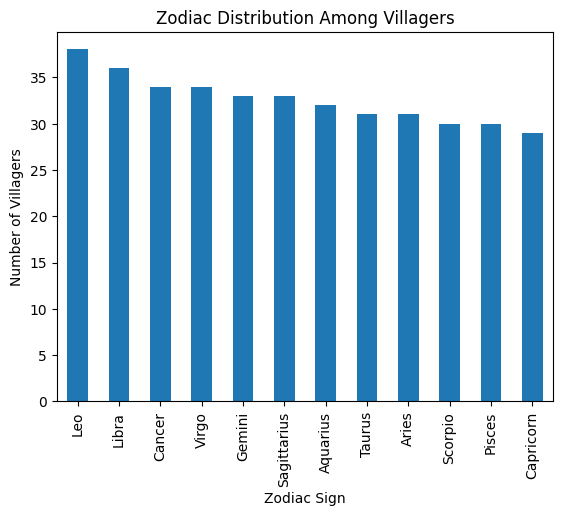

In [35]:
# Let's plot this distribution
zodiac_distribution.plot(kind='bar', title = 'Zodiac Distribution Among Villagers')
plt.xlabel('Zodiac Sign')
plt.ylabel('Number of Villagers')
plt.show()


## Insights from Zodiac Distribution Plot

The bar chart above shows the distribution of zodiac signs among the villagers in 'Animal Crossing'. The distribution is fairly even, with no sign being overly dominant or rare. This reflects a balanced approach to character design, ensuring that players who enjoy astrology might find a diverse range of personalities and characteristics within the game's community. The slight variation in numbers for each sign adds a layer of depth and realism, as such variations naturally occur in real-world populations.


## Project Summary: Analyzing 'Animal Crossing: New Horizons'

In this data analysis project, we dove deep into the charming world of 'Animal Crossing: New Horizons' to uncover insights about the game's reviews, the diversity of its villagers, and the variety of in-game items.

### Key Findings:

- **Review Analysis**: Our sentiment analysis revealed that there is a moderate positive correlation between the sentiment of user reviews and their scores, suggesting that more positive reviews tend to have higher scores. Additionally, we observed a decrease in average user review scores over time, which might reflect the natural ebb and flow of player engagement post-release.

- **Villager Demographics**: We explored the distribution of villagers' genders, species, and personalities. The gender distribution was relatively balanced, while the species and personality types showed a rich tapestry of diversity, contributing to varied and dynamic gameplay experiences.

- **Item Analysis**: We visualized the distribution of in-game items across different categories and their sell values. Furniture items were the most numerous, highlighting the game's focus on customization. The sell value analysis showed that most items are priced at the lower end, with rare high-value items offering players lucrative opportunities within the game's economy.

- **Crafting and Complexity**: We analyzed the complexity of crafting recipes, finding that most require a few components, suggesting an accessible crafting system with layers of complexity for those seeking a challenge.

- **Zodiac Signs**: By assigning zodiac signs to villagers based on their birthdays, we observed an even distribution across the astrological spectrum, adding a layer of personalization and connection for players interested in astrology.

### Conclusions:

Our journey through the datasets provided by VillagerDB and Metacritic has given us a quantitative window into the 'Animal Crossing' experience. From the shifting tides of player reviews to the intricate details of villager demographics and item economics, we've seen how data reflects the game's design and player interactions. The findings from this analysis not only enhance our understanding of 'Animal Crossing' but also illustrate the broader impact of game design choices on player engagement and satisfaction.

As a beginner project, this exploration has been a fruitful exercise in applying data analysis techniques to a real-world dataset. It offers a comprehensive look at the different facets of a beloved game and provides a foundation for further, more nuanced analysis.
